In [2]:
import numpy as np
import pandas as pd
import re
import string
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### 1. Load the Text Data

In [3]:
dat = pd.read_csv('bbc-text.csv')
dat.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
dat['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
dat['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

### 1.1 Clean the Text Data

In [7]:
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
   
    return text

cleaned_text = dat['text'].apply(lambda x:pre_process(x))
dat['cleaned_text'] = cleaned_text
dat.head()

,category,text,cleaned_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...


In [8]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

dat['tokenized_text'] = dat['cleaned_text'].apply(lambda x:tokenize(x))
dat.head()

,category,text,cleaned_text,tokenized_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [9]:
#read stopwords from csv file
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("stopwords(1).txt")

In [10]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

dat['nostop_text'] = dat['tokenized_text'].apply(lambda x: remove_stopwords(x))
dat.head()

,category,text,cleaned_text,tokenized_text,nostop_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, former, worldcom..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, rus..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, newcastle, fa, cup, premiership, new..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe..."


In [11]:
def lemmatizing (tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dat['lemmatized_text'] = dat['nostop_text'].apply(lambda x: lemmatizing(x))
dat.head()

,category,text,cleaned_text,tokenized_text,nostop_text,lemmatized_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy...","[tv, future, hand, viewer, home, theatre, syst..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, former, worldcom...","[worldcom, bos, left, book, former, worldcom, ..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, rus...","[tiger, wary, farrell, gamble, leicester, rush..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, newcastle, fa, cup, premiership, new...","[yeading, newcastle, fa, cup, premiership, new..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe...","[ocean, twelve, raid, box, office, ocean, twel..."


In [12]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenizing (tokenized_text):
    text = TreebankWordDetokenizer().detokenize(tokenized_text)
    return text

dat['lemmatized_text'] = dat['lemmatized_text'].apply(lambda x: detokenizing(x))
texts_all = dat['lemmatized_text']
dat.head()

,category,text,cleaned_text,tokenized_text,nostop_text,lemmatized_text
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy...",tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, former, worldcom...",worldcom bos left book former worldcom bos ber...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, rus...",tiger wary farrell gamble leicester rushed bid...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, newcastle, fa, cup, premiership, new...",yeading newcastle fa cup premiership newcastle...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe...",ocean twelve raid box office ocean twelve crim...


In [13]:
texts_all = dat['lemmatized_text']
print(texts_all[0])
print(texts_all.shape)

tv future hand viewer home theatre system plasma definition tv digital video recorder moving living people watch tv radically five time according expert panel gathered annual consumer electronics la vega discus technology impact favourite pastime leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front portable device talked technology ce digital personal video recorder dvr pvr set top box tivo uk sky system allow people record store play pause forward wind tv programme essentially technology allows personalised tv built definition tv set business japan slower europe lack definition programming people forward wind advert forget abiding network channel schedule putting own la carte entertainment network cable satellite company worried mean term advertising revenue brand identity viewer loyalty channel lead technology moment concern raised europe particularly growing uptake service sky happens nine month time uk ad

### 1.2 Bag of Word

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.155, max_features=7500)
texts_counts = count_vect.fit_transform(texts_all.tolist())

In [15]:
texts_counts.shape

(2225, 7500)

In [16]:
print(count_vect.stop_words_)
print(len(count_vect.stop_words_))

{'dorival', 'distraction', 'unruffled', 'gypsy', 'aussie', 'scrambler', 'dmb', 'demure', 'cordless', 'thermal', 'repealed', 'eustace', 'vellum', 'ecology', 'blb', 'strudwick', 'tweedbank', 'passcode', 'nanavati', 'antrim', 'fielding', 'chang', 'emailed', 'kleinberg', 'screwed', 'crucially', 'prompt', 'amazed', 'monterrey', 'immelt', 'cg', 'renfrewshire', 'lunatic', 'cottage', 'eldridge', 'melua', 'supersized', 'musselburgh', 'mikel', 'karlovic', 'necklace', 'jeddah', 'remiss', 'pickering', 'professionalism', 'relevance', 'tele', 'routinely', 'rage', 'sequoia', 'tarkovsky', 'accumulator', 'grohl', 'kiefer', 'utmost', 'nineteenth', 'calmed', 'underused', 'eady', 'frailty', 'avid', 'sarft', 'apparatus', 'revalue', 'atticus', 'disallowing', 'deliberation', 'remand', 'brankin', 'rnid', 'moratinos', 'execution', 'residual', 'tandy', 'poe', 'friedmann', 'crystalline', 'lucio', 'higgins', 'bizet', 'hypocrisy', 'tempting', 'accelerate', 'recognizes', 'warburton', 'beck', 'oxfordshire', 'outweig

In [17]:
sum_words = texts_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('film', 1148),
 ('bn', 958),
 ('music', 839),
 ('labour', 804),
 ('party', 799),
 ('election', 756),
 ('sale', 738),
 ('technology', 677),
 ('mobile', 664),
 ('england', 618),
 ('phone', 616),
 ('award', 607),
 ('blair', 604),
 ('report', 577),
 ('tax', 568),
 ('public', 557),
 ('system', 552),
 ('european', 551),
 ('tv', 544),
 ('british', 542)]

In [18]:
count_vect.get_feature_names()

['aaa',
 'abandoned',
 'abandoning',
 'abba',
 'abbas',
 'abbasi',
 'abbott',
 'abc',
 'aberdeen',
 'abeyie',
 'abiding',
 'ability',
 'able',
 'abn',
 'abolish',
 'abolishing',
 'abortion',
 'abortionist',
 'abroad',
 'absa',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'ac',
 'academic',
 'academy',
 'accelerating',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accident',
 'acclaim',
 'acclaimed',
 'accolade',
 'accompanied',
 'accomplished',
 'according',
 'account',
 'accountability',
 'accountable',
 'accountant',
 'accounted',
 'accounting',
 'accuracy',
 'accurate',
 'accusation',
 'accuse',
 'accused',
 'accusing',
 'ace',
 'aceh',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'acknowledge',
 'acknowledged',
 'acquire',
 'acquired',
 'acquisition',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actor',
 'actress',
 'actu

In [19]:
feature_names=np.array(count_vect.get_feature_names())
len(count_vect.get_feature_names())

7500

In [20]:
pd.DataFrame(texts_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3 TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
texts_tfidf = tfidf_transformer.fit_transform(texts_counts)

In [22]:
#the inverse document frequency (IDF) vector
tfidf_transformer.idf_

array([5.93537281, 5.81758977, 6.62851999, ..., 6.40537644, 5.66343909,
       5.99991133])

In [23]:
pd.DataFrame(texts_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# find maximum value for each of the features over dataset:
max_value = texts_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['wgbh' 'loaded' 'commonplace' 'etc' 'removable' 'receiver' 'savvy'
 'navigate' 'downloadable' 'feedback' 'relies' 'compressed' 'sits'
 'specification' 'connectivity' 'sadly' 'aftermath' 'angled' 'vastly'
 'pen']
Features with highest tfidf: 
['mtv' 'duran' 'robot' 'melcher' 'wpp' 'fiat' 'domain' 'diageo' 'nestle'
 'dallaglio' 'casino' 'regiment' 'ballet' 'ink' 'blog' 'godzilla' 'uwb'
 'ssl' 'rossignol' 'commodore']


### 2. Extracting Keywords

In [25]:
topn = 20
results =[]
results1 = []

In [26]:
for idx, doc in texts_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=texts_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    result1 = word
    
    results.append(result)
    results1.append(result1)

In [27]:
results

[{'tv': 0.449,
  'brand': 0.242,
  'channel': 0.192,
  'definition': 0.175,
  'tivo': 0.173,
  'viewer': 0.163,
  'network': 0.159,
  'watch': 0.155,
  'satellite': 0.152,
  'recorder': 0.145,
  'content': 0.144,
  'technology': 0.142,
  'lcd': 0.117,
  'loyalty': 0.115,
  'programme': 0.115,
  'mean': 0.108,
  'pause': 0.107,
  'ce': 0.106,
  'wind': 0.105,
  'launched': 0.102},
 {'worldcom': 0.483,
  'ebbers': 0.444,
  'myers': 0.352,
  'accounting': 0.276,
  'fraud': 0.141,
  'lawyer': 0.131,
  'defence': 0.128,
  'bn': 0.118,
  'collapsed': 0.117,
  'witness': 0.117,
  'bos': 0.117,
  'replied': 0.114,
  'sullivan': 0.109,
  'prosecutor': 0.105,
  'telecom': 0.098,
  'entry': 0.097,
  'guilty': 0.095,
  'former': 0.088,
  'admitted': 0.08,
  'book': 0.08},
 {'farrell': 0.544,
  'gamble': 0.321,
  'leicester': 0.247,
  'rugby': 0.218,
  'league': 0.2,
  'tiger': 0.191,
  'union': 0.183,
  'knee': 0.173,
  'andy': 0.14,
  'involved': 0.127,
  'club': 0.118,
  'whoever': 0.109,
  'sar

In [28]:
dat['keywords'] = results
dat.head()

,category,text,cleaned_text,tokenized_text,nostop_text,lemmatized_text,keywords
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy...",tv future hand viewer home theatre system plas...,"{'tv': 0.449, 'brand': 0.242, 'channel': 0.192..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, former, worldcom...",worldcom bos left book former worldcom bos ber...,"{'worldcom': 0.483, 'ebbers': 0.444, 'myers': ..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, rus...",tiger wary farrell gamble leicester rushed bid...,"{'farrell': 0.544, 'gamble': 0.321, 'leicester..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, newcastle, fa, cup, premiership, new...",yeading newcastle fa cup premiership newcastle...,"{'league': 0.217, 'west': 0.183, 'cup': 0.161,..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe...",ocean twelve raid box office ocean twelve crim...,"{'ocean': 0.419, 'sequel': 0.368, 'twelve': 0...."


### 2.1 Association Rule Mining on All Extracted Keywords

In [28]:
dat['keywords'] = results1
dat.head()

,category,text,cleaned_text,tokenized_text,nostop_text,lemmatized_text,keywords
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with...","[tv, future, hands, viewers, home, theatre, sy...",tv future hand viewer home theatre system plas...,"[tv, brand, channel, definition, tivo, viewer,..."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, books, former, worldcom...",worldcom bos left book former worldcom bos ber...,"[worldcom, ebbers, myers, accounting, fraud, l..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[tigers, wary, of, farrell, gamble, leicester,...","[tigers, wary, farrell, gamble, leicester, rus...",tiger wary farrell gamble leicester rushed bid...,"[farrell, gamble, leicester, rugby, league, ti..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie...","[yeading, newcastle, fa, cup, premiership, new...",yeading newcastle fa cup premiership newcastle...,"[league, west, cup, united, drawn, swindon, ne..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ...","[ocean, twelve, raids, box, office, ocean, twe...",ocean twelve raid box office ocean twelve crim...,"[ocean, sequel, twelve, clooney, starring, pit..."


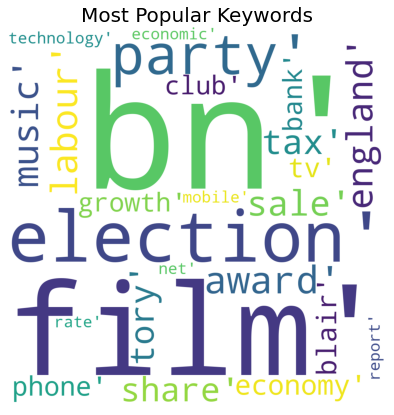

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (7, 7)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 25).generate(str(results1))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords',fontsize = 20)
plt.show()

In [30]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data_encoded = te.fit_transform(results1)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)

# getting the shape of the data
data_encoded.shape

(2225, 7148)

In [31]:
data_encoded

,aaa,abandoned,abandoning,abba,abbas,abbasi,abbott,abc,aberdeen,abeyie,...,zafi,zambia,zealand,zen,zero,zhang,zimbabwe,zombie,zone,zurich
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets=apriori(data_encoded, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.014382,(access)
1,0.014382,(act)
2,0.013483,(action)
3,0.021124,(actor)
4,0.013933,(actress)
...,...,...
382,0.010787,"(handset, phone, mobile)"
383,0.010337,"(howard, labour, tory)"
384,0.011685,"(party, labour, tory)"
385,0.010337,"(labour, tax, tory)"


In [33]:
frequent_itemsets[['support']].describe()

,support
count,387.000000
mean,0.017087
std,0.008006
min,0.010337
25%,0.012135
50%,0.014382
75%,0.019775
max,0.066966


In [34]:
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,"(handset, phone)",(mobile),0.010787,0.032809,0.010787,1.000000,30.479452,0.010433,inf
23,(handset),(mobile),0.011685,0.032809,0.011685,1.000000,30.479452,0.011302,inf
39,"(election, chancellor)",(brown),0.013933,0.031461,0.013483,0.967742,30.760369,0.013045,30.024719
73,"(labour, election, chancellor)",(brown),0.013034,0.031461,0.012584,0.965517,30.689655,0.012174,28.087640
48,"(election, chancellor)",(labour),0.013933,0.051685,0.013034,0.935484,18.099579,0.012314,14.698876


In [35]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=10)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
140,"(labour, brown)","(election, chancellor)",0.016629,0.013933,0.012584,0.756757,54.315606,0.012353,4.053833
145,"(election, chancellor)","(labour, brown)",0.013933,0.016629,0.012584,0.903226,54.315606,0.012353,10.161498
143,"(brown, election)","(labour, chancellor)",0.016629,0.016180,0.012584,0.756757,46.771772,0.012315,4.044594
142,"(labour, chancellor)","(brown, election)",0.016180,0.016629,0.012584,0.777778,46.771772,0.012315,4.425169
114,"(phone, mobile)",(handset),0.022921,0.011685,0.010787,0.470588,40.271493,0.010519,1.866816


In [36]:
rules = rules_l[ (rules_l['lift'] >= 10) &
       (rules_l['confidence'] >= 0.9) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
145,"(election, chancellor)","(labour, brown)",0.013933,0.016629,0.012584,0.903226,54.315606,0.012353,10.161498
115,(handset),"(phone, mobile)",0.011685,0.022921,0.010787,0.923077,40.271493,0.010519,12.702022
136,"(labour, brown, election)",(chancellor),0.013933,0.023820,0.012584,0.903226,37.918442,0.012252,10.087191
62,"(election, chancellor)",(brown),0.013933,0.031461,0.013483,0.967742,30.760369,0.013045,30.024719
138,"(labour, election, chancellor)",(brown),0.013034,0.031461,0.012584,0.965517,30.689655,0.012174,28.087640


In [37]:
rules = rules_c[ (rules_c['lift'] >= 10) &
       (rules_c['confidence'] >= 0.9) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,"(handset, phone)",(mobile),0.010787,0.032809,0.010787,1.000000,30.479452,0.010433,inf
23,(handset),(mobile),0.011685,0.032809,0.011685,1.000000,30.479452,0.011302,inf
39,"(election, chancellor)",(brown),0.013933,0.031461,0.013483,0.967742,30.760369,0.013045,30.024719
73,"(labour, election, chancellor)",(brown),0.013034,0.031461,0.012584,0.965517,30.689655,0.012174,28.087640
48,"(election, chancellor)",(labour),0.013933,0.051685,0.013034,0.935484,18.099579,0.012314,14.698876


### 2.2 Association Rule Mining on Keywords of each Category

In [38]:
#filtering keywords for each category
tech = dat.keywords[dat.category=='tech']
entertainment = dat.keywords[dat.category=='entertainment']
business = dat.keywords[dat.category=='business']
sport = dat.keywords[dat.category=='sport']
politics = dat.keywords[dat.category=='politics']

In [39]:
#putting keywords of each category into lists
techList = []
entertainmentList = []
businessList = []
sportList = []
politicsList = []

techList.extend(tech)
entertainmentList.extend(entertainment)
businessList.extend(business)
sportList.extend(sport)
politicsList.extend(politics)

#### 2.2.1 Association Rule Mining on Tech Keywords

In [40]:
data_encoded1 = te.fit_transform(techList)
data_encoded1 = pd.DataFrame(data_encoded1, columns = te.columns_)

# getting the shape of the data
data_encoded1.shape

(401, 2401)

In [41]:
frequent_itemsets1=apriori(data_encoded1, min_support = 0.015, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.059850,(access)
1,0.019950,(according)
2,0.032419,(address)
3,0.017456,(advantage)
4,0.039900,(anti)
...,...,...
807,0.017456,"(handheld, psp, console, nintendo, sony)"
808,0.017456,"(digital, electronics, gadget, consumer, device)"
809,0.017456,"(video, digital, technology, gadget, device)"
810,0.017456,"(user, virus, security, microsoft, program)"


In [42]:
rules_c = association_rules(frequent_itemsets1, metric="confidence", min_threshold=1)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mini),(apple),0.022444,0.057357,0.022444,1.0,17.434783,0.021157,inf
161,"(machine, gamers)","(console, nintendo)",0.017456,0.029925,0.017456,1.0,33.416667,0.016934,inf
219,"(handheld, psp)","(nintendo, sony)",0.019950,0.024938,0.019950,1.0,40.100000,0.019453,inf
218,"(nintendo, psp)","(handheld, sony)",0.019950,0.019950,0.019950,1.0,50.125000,0.019552,inf
217,"(nintendo, handheld, sony)",(psp),0.019950,0.029925,0.019950,1.0,33.416667,0.019353,inf


In [43]:
rules_l = association_rules(frequent_itemsets1, metric="lift", min_threshold=10)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
451,(parliament),"(patent, law)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
1304,"(electronics, device)","(digital, gadget, consumer)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
1021,(parliament),"(patent, software, law)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
1174,"(video, gadget, consumer)","(ce, device)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
446,"(patent, law)",(parliament),0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf


In [44]:
rules = rules_l[ (rules_l['lift'] >= 10) &
       (rules_l['confidence'] >= 1) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
451,(parliament),"(patent, law)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
1304,"(electronics, device)","(digital, gadget, consumer)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
1021,(parliament),"(patent, software, law)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
1174,"(video, gadget, consumer)","(ce, device)",0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf
446,"(patent, law)",(parliament),0.017456,0.017456,0.017456,1.0,57.285714,0.017152,inf


#### 2.2.2 Association Rule Mining on Entertainment Keywords

In [45]:
data_encoded2 = te.fit_transform(entertainmentList)
data_encoded2 = pd.DataFrame(data_encoded2, columns = te.columns_)

# getting the shape of the data
data_encoded2.shape

(386, 2768)

In [46]:
frequent_itemsets2=apriori(data_encoded2, min_support = 0.015, use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.028497,(academy)
1,0.046632,(act)
2,0.015544,(action)
3,0.121762,(actor)
4,0.080311,(actress)
...,...,...
660,0.015544,"(box, release, office, oscar)"
661,0.015544,"(release, office, film, oscar)"
662,0.015544,"(film, award, aviator, baby, oscar)"
663,0.018135,"(film, aviator, baby, oscar, dollar)"


In [47]:
rules_c = association_rules(frequent_itemsets2, metric="confidence", min_threshold=1)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(academy),(oscar),0.028497,0.119171,0.028497,1.0,8.391304,0.025101,inf
80,"(film, dollar, baby)",(aviator),0.018135,0.051813,0.018135,1.0,19.300000,0.017195,inf
93,"(award, dollar)","(baby, oscar)",0.015544,0.025907,0.015544,1.0,38.600000,0.015141,inf
92,"(award, dollar, baby)",(oscar),0.015544,0.119171,0.015544,1.0,8.391304,0.013692,inf
91,"(award, dollar, oscar)",(baby),0.015544,0.033679,0.015544,1.0,29.692308,0.015021,inf


In [48]:
rules_l = association_rules(frequent_itemsets2, metric="lift", min_threshold=10)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(keanu),(reef),0.015544,0.018135,0.015544,1.000000,55.142857,0.015262,inf
32,(reef),(keanu),0.018135,0.015544,0.015544,0.857143,55.142857,0.015262,6.891192
24,(drake),(vera),0.020725,0.018135,0.018135,0.875000,48.250000,0.017759,7.854922
25,(vera),(drake),0.018135,0.020725,0.018135,1.000000,48.250000,0.017759,inf
27,(hoffman),(dustin),0.018135,0.018135,0.015544,0.857143,47.265306,0.015215,6.873057


In [49]:
rules = rules_c[ (rules_c['lift'] >= 10) &
       (rules_c['confidence'] >= 1) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(film, dollar, baby)",(aviator),0.018135,0.051813,0.018135,1.0,19.300000,0.017195,inf
93,"(award, dollar)","(baby, oscar)",0.015544,0.025907,0.015544,1.0,38.600000,0.015141,inf
91,"(award, dollar, oscar)",(baby),0.015544,0.033679,0.015544,1.0,29.692308,0.015021,inf
90,"(nomination, aviator)","(film, oscar)",0.015544,0.093264,0.015544,1.0,10.722222,0.014094,inf
86,"(film, dollar, oscar)",(aviator),0.018135,0.051813,0.018135,1.0,19.300000,0.017195,inf


#### 2.2.3 Association Rule Mining on Business Keywords

In [50]:
data_encoded3 = te.fit_transform(businessList)
data_encoded3 = pd.DataFrame(data_encoded3, columns = te.columns_)

# getting the shape of the data
data_encoded3.shape

(510, 3127)

In [51]:
frequent_itemsets3=apriori(data_encoded3, min_support = 0.015, use_colnames = True)
frequent_itemsets3

,support,itemsets
0,0.033333,(account)
1,0.017647,(accounting)
2,0.017647,(administration)
3,0.019608,(agreed)
4,0.029412,(agreement)
...,...,...
780,0.015686,"(russia, yugansk, oil, yukos, russian)"
781,0.015686,"(russia, yugansk, rosneft, yukos, russian)"
782,0.015686,"(court, bankruptcy, auction, gazprom, yukos, r..."
783,0.017647,"(court, bankruptcy, bn, gazprom, yukos, russian)"


In [52]:
rules_c = association_rules(frequent_itemsets3, metric="confidence", min_threshold=1)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(barrel),(oil),0.019608,0.094118,0.019608,1.0,10.625000,0.017762,inf
412,"(auction, court, gazprom)","(yukos, russian)",0.015686,0.041176,0.015686,1.0,24.285714,0.015040,inf
405,"(bankruptcy, auction, gazprom)","(yukos, russian)",0.015686,0.041176,0.015686,1.0,24.285714,0.015040,inf
406,"(bankruptcy, auction, yukos)","(russian, gazprom)",0.015686,0.027451,0.015686,1.0,36.428571,0.015256,inf
407,"(bankruptcy, auction, russian)","(yukos, gazprom)",0.015686,0.029412,0.015686,1.0,34.000000,0.015225,inf


In [53]:
rules_l = association_rules(frequent_itemsets3, metric="lift", min_threshold=10)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2113,"(boerse, euronext)","(london, bid, deutsche)",0.015686,0.015686,0.015686,1.0,63.75,0.01544,inf
1454,"(london, exchange)","(stock, boerse)",0.015686,0.015686,0.015686,1.0,63.75,0.01544,inf
1528,"(deutsche, stock)","(london, exchange)",0.015686,0.015686,0.015686,1.0,63.75,0.01544,inf
1151,(euronext),"(london, bid, deutsche)",0.015686,0.015686,0.015686,1.0,63.75,0.01544,inf
1142,"(london, bid, deutsche)",(euronext),0.015686,0.015686,0.015686,1.0,63.75,0.01544,inf


In [54]:
rules = rules_c[ (rules_c['lift'] >= 10) &
       (rules_c['confidence'] >= 1) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(barrel),(oil),0.019608,0.094118,0.019608,1.0,10.625000,0.017762,inf
412,"(auction, court, gazprom)","(yukos, russian)",0.015686,0.041176,0.015686,1.0,24.285714,0.015040,inf
405,"(bankruptcy, auction, gazprom)","(yukos, russian)",0.015686,0.041176,0.015686,1.0,24.285714,0.015040,inf
406,"(bankruptcy, auction, yukos)","(russian, gazprom)",0.015686,0.027451,0.015686,1.0,36.428571,0.015256,inf
407,"(bankruptcy, auction, russian)","(yukos, gazprom)",0.015686,0.029412,0.015686,1.0,34.000000,0.015225,inf


#### 2.2.4 Association Rule Mining on Sport Keywords

In [55]:
data_encoded4 = te.fit_transform(sportList)
data_encoded4 = pd.DataFrame(data_encoded4, columns = te.columns_)

# getting the shape of the data
data_encoded4.shape

(511, 2987)

In [56]:
frequent_itemsets4=apriori(data_encoded4, min_support = 0.01, use_colnames = True)
frequent_itemsets4

,support,itemsets
0,0.017613,(aaa)
1,0.013699,(ac)
2,0.015656,(action)
3,0.021526,(agassi)
4,0.048924,(am)
...,...,...
1213,0.013699,"(drug, kenteris, iaaf, greek, test, thanou)"
1214,0.011742,"(drug, kenteris, greek, test, olympics, thanou)"
1215,0.011742,"(kenteris, iaaf, greek, test, missing, thanou)"
1216,0.015656,"(kenteris, iaaf, greek, test, olympics, thanou)"


In [57]:
rules_c = association_rules(frequent_itemsets4, metric="confidence", min_threshold=1)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(anfield),(liverpool),0.019569,0.050881,0.019569,1.0,19.653846,0.018574,inf
760,"(athletics, test)","(kenteris, thanou, greek)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf
766,"(charge, thanou, test)","(kenteris, greek)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf
765,"(charge, greek, test)","(kenteris, thanou)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf
764,"(charge, kenteris, test)","(thanou, greek)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf


In [58]:
rules_l = association_rules(frequent_itemsets4, metric="lift", min_threshold=10)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1106,"(ivan, seed)",(ljubicic),0.011742,0.011742,0.011742,1.0,85.166667,0.011604,inf
255,(sania),(mirza),0.011742,0.011742,0.011742,1.0,85.166667,0.011604,inf
1111,(ljubicic),"(ivan, seed)",0.011742,0.011742,0.011742,1.0,85.166667,0.011604,inf
254,(mirza),(sania),0.011742,0.011742,0.011742,1.0,85.166667,0.011604,inf
661,(hayley),"(cross, yelling)",0.013699,0.013699,0.013699,1.0,73.000000,0.013511,inf


In [59]:
rules = rules_c[ (rules_c['lift'] >= 10) &
       (rules_c['confidence'] >= 1) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(anfield),(liverpool),0.019569,0.050881,0.019569,1.0,19.653846,0.018574,inf
760,"(athletics, test)","(kenteris, thanou, greek)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf
766,"(charge, thanou, test)","(kenteris, greek)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf
765,"(charge, greek, test)","(kenteris, thanou)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf
764,"(charge, kenteris, test)","(thanou, greek)",0.011742,0.027397,0.011742,1.0,36.500000,0.011420,inf


#### 2.2.5 Association Rule Mining on Politics Keywords

In [60]:
data_encoded5 = te.fit_transform(politicsList)
data_encoded5 = pd.DataFrame(data_encoded5, columns = te.columns_)

# getting the shape of the data
data_encoded5.shape

(417, 2697)

In [61]:
frequent_itemsets5=apriori(data_encoded5, min_support = 0.01, use_colnames = True)
frequent_itemsets5

,support,itemsets
0,0.011990,(access)
1,0.021583,(act)
2,0.011990,(address)
3,0.011990,(adult)
4,0.021583,(advice)
...,...,...
3112,0.011990,"(party, tory, labour, election, dem, kennedy, ..."
3113,0.011990,"(labour, tax, election, democrat, liberal, par..."
3114,0.011990,"(strike, public, worker, union, unison, sector..."
3115,0.011990,"(brown, prime, book, chancellor, labour, elect..."


In [62]:
rules_c = association_rules(frequent_itemsets5, metric="confidence", min_threshold=1)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ally),(brown),0.016787,0.134293,0.016787,1.0,7.446429,0.014532,inf
5359,"(unified, brown, election, chancellor)","(prime, blair)",0.011990,0.091127,0.011990,1.0,10.973684,0.010898,inf
5372,"(unified, prime, blair)","(brown, election, chancellor)",0.011990,0.071942,0.011990,1.0,13.900000,0.011128,inf
5371,"(unified, election, prime)","(blair, brown, chancellor)",0.011990,0.047962,0.011990,1.0,20.850000,0.011415,inf
5370,"(unified, prime, chancellor)","(brown, election, blair)",0.011990,0.047962,0.011990,1.0,20.850000,0.011415,inf


In [63]:
rules_l = association_rules(frequent_itemsets5, metric="lift", min_threshold=10)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8674,"(stability, budget)","(rule, chancellor, spending)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
10206,"(union, sector)","(pension, unison, public)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
10209,"(unison, pension)","(union, sector, public)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
10210,"(sector, pension)","(union, unison, public)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
5064,"(worker, public)","(unison, sector)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf


In [64]:
rules = rules_l[ (rules_l['lift'] >= 10) &
       (rules_l['confidence'] >= 1) ]
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8674,"(stability, budget)","(rule, chancellor, spending)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
10206,"(union, sector)","(pension, unison, public)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
10209,"(unison, pension)","(union, sector, public)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
10210,"(sector, pension)","(union, unison, public)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf
5064,"(worker, public)","(unison, sector)",0.01199,0.01199,0.01199,1.0,83.4,0.011847,inf


## 3. Classification Modeling

### 3.1 Using Random Forest Classifier

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 

### 3.1.1 Using Bag of Word

In [61]:
#Sample data
X1 = texts_counts.toarray() 
y = dat['category'].map( {'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4} ).astype(int)

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [64]:
#Build model
scores = cross_val_score(RandomForestClassifier(random_state=2, n_jobs=-1), X1_train, y_train, cv=5)
print(scores)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

[0.97752809 0.95505618 0.95505618 0.96348315 0.96629213]
Mean cross-validation accuracy: 0.9635


In [67]:
#Improve model
#Seting the Hyper Parameters
param_grid = {"max_depth": [10,15,20,25,30,60,90],
              "n_estimators":[10,15,20,30,50,100,150,300,400,500,1000]}

#Creating the classifier
model = RandomForestClassifier(random_state=2, n_jobs=-1)

gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
gs_fit = gs.fit(X1_train, y_train)
gs_fit

Fitting 5 folds for each of 77 candidates, totalling 385 fits
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=10, n_estimators=10, score=0.865, total=   3.4s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=10, score=0.860, total=   0.5s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=10, score=0.860, total=   0.5s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=10, score=0.860, total=   0.6s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] ....... max_depth=10, n_estimators=10, score=0.902, total=   0.5s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.893, total=   0.6s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.885, total=   0.6s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.899, total=   0.6s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.890, total=   0.5s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.919, total=   0.6s
[CV] max_depth=10, n_estimators=20 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=15, score=0.913, total=   0.5s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] ....... max_depth=15, n_estimators=15, score=0.927, total=   0.6s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] ....... max_depth=15, n_estimators=15, score=0.899, total=   0.5s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] ....... max_depth=15, n_estimators=15, score=0.941, total=   0.6s
[CV] max_depth=15, n_estimators=20 ...................................
[CV] ....... max_depth=15, n_estimators=20, score=0.941, total=   0.6s
[CV] max_depth=15, n_estimators=20 ...................................
[CV] ....... max_depth=15, n_estimators=20, score=0.927, total=   0.6s
[CV] max_depth=15, n_estimators=20 ...................................
[CV] ....... max_depth=15, n_estimators=20, score=0.930, total=   0.7s
[CV] max_depth=15, n_estimators=20 ...................................
[CV] .

[CV] ....... max_depth=20, n_estimators=15, score=0.944, total=   0.6s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] ....... max_depth=20, n_estimators=20, score=0.944, total=   0.7s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] ....... max_depth=20, n_estimators=20, score=0.924, total=   0.7s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] ....... max_depth=20, n_estimators=20, score=0.930, total=   0.7s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] ....... max_depth=20, n_estimators=20, score=0.933, total=   0.7s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] ....... max_depth=20, n_estimators=20, score=0.947, total=   0.7s
[CV] max_depth=20, n_estimators=30 ...................................
[CV] ....... max_depth=20, n_estimators=30, score=0.944, total=   0.8s
[CV] max_depth=20, n_estimators=30 ...................................
[CV] .

[CV] ....... max_depth=25, n_estimators=20, score=0.938, total=   0.7s
[CV] max_depth=25, n_estimators=20 ...................................
[CV] ....... max_depth=25, n_estimators=20, score=0.921, total=   0.6s
[CV] max_depth=25, n_estimators=20 ...................................
[CV] ....... max_depth=25, n_estimators=20, score=0.958, total=   0.7s
[CV] max_depth=25, n_estimators=30 ...................................
[CV] ....... max_depth=25, n_estimators=30, score=0.958, total=   0.9s
[CV] max_depth=25, n_estimators=30 ...................................
[CV] ....... max_depth=25, n_estimators=30, score=0.935, total=   0.8s
[CV] max_depth=25, n_estimators=30 ...................................
[CV] ....... max_depth=25, n_estimators=30, score=0.944, total=   0.7s
[CV] max_depth=25, n_estimators=30 ...................................
[CV] ....... max_depth=25, n_estimators=30, score=0.933, total=   0.9s
[CV] max_depth=25, n_estimators=30 ...................................
[CV] .

[CV] ....... max_depth=30, n_estimators=30, score=0.952, total=   0.8s
[CV] max_depth=30, n_estimators=30 ...................................
[CV] ....... max_depth=30, n_estimators=30, score=0.938, total=   0.7s
[CV] max_depth=30, n_estimators=30 ...................................
[CV] ....... max_depth=30, n_estimators=30, score=0.955, total=   0.9s
[CV] max_depth=30, n_estimators=30 ...................................
[CV] ....... max_depth=30, n_estimators=30, score=0.969, total=   0.9s
[CV] max_depth=30, n_estimators=30 ...................................
[CV] ....... max_depth=30, n_estimators=30, score=0.955, total=   0.8s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] ....... max_depth=30, n_estimators=50, score=0.958, total=   1.1s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] ....... max_depth=30, n_estimators=50, score=0.955, total=   1.0s
[CV] max_depth=30, n_estimators=50 ...................................
[CV] .

[CV] ....... max_depth=60, n_estimators=30, score=0.944, total=   0.9s
[CV] max_depth=60, n_estimators=30 ...................................
[CV] ....... max_depth=60, n_estimators=30, score=0.958, total=   0.8s
[CV] max_depth=60, n_estimators=50 ...................................
[CV] ....... max_depth=60, n_estimators=50, score=0.975, total=   1.2s
[CV] max_depth=60, n_estimators=50 ...................................
[CV] ....... max_depth=60, n_estimators=50, score=0.949, total=   1.1s
[CV] max_depth=60, n_estimators=50 ...................................
[CV] ....... max_depth=60, n_estimators=50, score=0.961, total=   1.1s
[CV] max_depth=60, n_estimators=50 ...................................
[CV] ....... max_depth=60, n_estimators=50, score=0.963, total=   1.0s
[CV] max_depth=60, n_estimators=50 ...................................
[CV] ....... max_depth=60, n_estimators=50, score=0.961, total=   1.1s
[CV] max_depth=60, n_estimators=100 ..................................
[CV] .

[CV] ....... max_depth=90, n_estimators=50, score=0.952, total=   1.0s
[CV] max_depth=90, n_estimators=50 ...................................
[CV] ....... max_depth=90, n_estimators=50, score=0.952, total=   1.0s
[CV] max_depth=90, n_estimators=50 ...................................
[CV] ....... max_depth=90, n_estimators=50, score=0.966, total=   1.2s
[CV] max_depth=90, n_estimators=50 ...................................
[CV] ....... max_depth=90, n_estimators=50, score=0.969, total=   1.1s
[CV] max_depth=90, n_estimators=100 ..................................
[CV] ...... max_depth=90, n_estimators=100, score=0.978, total=   1.9s
[CV] max_depth=90, n_estimators=100 ..................................
[CV] ...... max_depth=90, n_estimators=100, score=0.955, total=   1.8s
[CV] max_depth=90, n_estimators=100 ..................................
[CV] ...... max_depth=90, n_estimators=100, score=0.955, total=   1.8s
[CV] max_depth=90, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 385 out of 385 | elapsed: 19.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=2),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 60, 90],
                         'n_estimators': [10, 15, 20, 30, 50, 100, 150, 300,
                                          400, 500, 1000]},
             scoring='accuracy', verbose=4)

In [68]:
print("Best cross-validation score: {:.4f}".format(gs_fit.best_score_))
print("Best parameters: ", gs_fit.best_params_)

Best cross-validation score: 0.9674
Best parameters:  {'max_depth': 60, 'n_estimators': 500}


In [69]:
#Evaluate model
y_pred = gs_fit.predict(X1_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.9640449438202248


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       112
           1       0.97      0.94      0.96       104
           2       0.96      0.97      0.96        66
           3       0.97      0.97      0.97        87
           4       0.95      0.93      0.94        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [70]:
print("Test score: {:.4f}".format(gs_fit.score(X_test, y_test)))

Test score: 0.9640


### 3.1.2 Using TF-IDF

In [65]:
#Sample data
X2 = texts_tfidf.toarray() 
y = dat['category'].map( {'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4} ).astype(int)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=2)

In [66]:
#Build model
scores = cross_val_score(RandomForestClassifier(random_state=2, n_jobs=-1), X2_train, y_train, cv=5)
print(scores)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

[0.96910112 0.95505618 0.95224719 0.96067416 0.96348315]
Mean cross-validation accuracy: 0.9601


In [74]:
#Improve model
#Seting the Hyper Parameters
param_grid = {"max_depth": [10,15,20,25,30,60,90,150,200],
              "n_estimators":[10,15,20,30,50,100,150,300,400,500,700,1000]}

#Creating the classifier
model = RandomForestClassifier(random_state=2, n_jobs=-1)

gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4)
gs_fit = gs.fit(X2_train, y_train)
gs_fit

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=10, n_estimators=10, score=0.868, total=   0.6s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=10, score=0.879, total=   0.6s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=10, score=0.882, total=   0.6s
[CV] max_depth=10, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] ....... max_depth=10, n_estimators=10, score=0.857, total=   0.6s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] ....... max_depth=10, n_estimators=10, score=0.893, total=   0.6s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.896, total=   0.7s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.896, total=   0.7s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.893, total=   0.8s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.890, total=   0.7s
[CV] max_depth=10, n_estimators=15 ...................................
[CV] ....... max_depth=10, n_estimators=15, score=0.930, total=   0.8s
[CV] max_depth=10, n_estimators=20 ...................................
[CV] .

[CV] ....... max_depth=15, n_estimators=10, score=0.899, total=   0.7s
[CV] max_depth=15, n_estimators=10 ...................................
[CV] ....... max_depth=15, n_estimators=10, score=0.899, total=   0.6s
[CV] max_depth=15, n_estimators=10 ...................................
[CV] ....... max_depth=15, n_estimators=10, score=0.854, total=   0.6s
[CV] max_depth=15, n_estimators=10 ...................................
[CV] ....... max_depth=15, n_estimators=10, score=0.888, total=   0.7s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] ....... max_depth=15, n_estimators=15, score=0.933, total=   0.7s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] ....... max_depth=15, n_estimators=15, score=0.910, total=   0.7s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] ....... max_depth=15, n_estimators=15, score=0.921, total=   0.7s
[CV] max_depth=15, n_estimators=15 ...................................
[CV] .

[CV] ..... max_depth=15, n_estimators=1000, score=0.966, total=  13.4s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.904, total=   0.8s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.910, total=   0.7s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.910, total=   0.7s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.921, total=   0.8s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.921, total=   0.7s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] ....... max_depth=20, n_estimators=15, score=0.935, total=   0.8s
[CV] max_depth=20, n_estimators=15 ...................................
[CV] .

[CV] ..... max_depth=20, n_estimators=1000, score=0.969, total=  14.7s
[CV] max_depth=20, n_estimators=1000 .................................
[CV] ..... max_depth=20, n_estimators=1000, score=0.952, total=  14.0s
[CV] max_depth=20, n_estimators=1000 .................................
[CV] ..... max_depth=20, n_estimators=1000, score=0.966, total=  13.7s
[CV] max_depth=25, n_estimators=10 ...................................
[CV] ....... max_depth=25, n_estimators=10, score=0.902, total=   0.5s
[CV] max_depth=25, n_estimators=10 ...................................
[CV] ....... max_depth=25, n_estimators=10, score=0.910, total=   0.7s
[CV] max_depth=25, n_estimators=10 ...................................
[CV] ....... max_depth=25, n_estimators=10, score=0.921, total=   0.6s
[CV] max_depth=25, n_estimators=10 ...................................
[CV] ....... max_depth=25, n_estimators=10, score=0.907, total=   0.6s
[CV] max_depth=25, n_estimators=10 ...................................
[CV] .

[CV] ..... max_depth=25, n_estimators=1000, score=0.969, total=  12.0s
[CV] max_depth=25, n_estimators=1000 .................................
[CV] ..... max_depth=25, n_estimators=1000, score=0.961, total=  14.7s
[CV] max_depth=25, n_estimators=1000 .................................
[CV] ..... max_depth=25, n_estimators=1000, score=0.969, total=  12.0s
[CV] max_depth=25, n_estimators=1000 .................................
[CV] ..... max_depth=25, n_estimators=1000, score=0.961, total=  12.2s
[CV] max_depth=25, n_estimators=1000 .................................
[CV] ..... max_depth=25, n_estimators=1000, score=0.966, total=  11.7s
[CV] max_depth=30, n_estimators=10 ...................................
[CV] ....... max_depth=30, n_estimators=10, score=0.933, total=   0.5s
[CV] max_depth=30, n_estimators=10 ...................................
[CV] ....... max_depth=30, n_estimators=10, score=0.910, total=   0.7s
[CV] max_depth=30, n_estimators=10 ...................................
[CV] .

[CV] ...... max_depth=30, n_estimators=700, score=0.961, total=   9.0s
[CV] max_depth=30, n_estimators=700 ..................................
[CV] ...... max_depth=30, n_estimators=700, score=0.969, total=   9.5s
[CV] max_depth=30, n_estimators=1000 .................................
[CV] ..... max_depth=30, n_estimators=1000, score=0.972, total=  13.8s
[CV] max_depth=30, n_estimators=1000 .................................
[CV] ..... max_depth=30, n_estimators=1000, score=0.963, total=  13.6s
[CV] max_depth=30, n_estimators=1000 .................................
[CV] ..... max_depth=30, n_estimators=1000, score=0.969, total=  13.0s
[CV] max_depth=30, n_estimators=1000 .................................
[CV] ..... max_depth=30, n_estimators=1000, score=0.961, total=  13.3s
[CV] max_depth=30, n_estimators=1000 .................................
[CV] ..... max_depth=30, n_estimators=1000, score=0.969, total=  13.1s
[CV] max_depth=60, n_estimators=10 ...................................
[CV] .

[CV] ...... max_depth=60, n_estimators=700, score=0.963, total=  10.4s
[CV] max_depth=60, n_estimators=700 ..................................
[CV] ...... max_depth=60, n_estimators=700, score=0.963, total=  10.0s
[CV] max_depth=60, n_estimators=700 ..................................
[CV] ...... max_depth=60, n_estimators=700, score=0.961, total=  10.4s
[CV] max_depth=60, n_estimators=700 ..................................
[CV] ...... max_depth=60, n_estimators=700, score=0.966, total=  10.2s
[CV] max_depth=60, n_estimators=1000 .................................
[CV] ..... max_depth=60, n_estimators=1000, score=0.972, total=  14.1s
[CV] max_depth=60, n_estimators=1000 .................................
[CV] ..... max_depth=60, n_estimators=1000, score=0.961, total=  14.0s
[CV] max_depth=60, n_estimators=1000 .................................
[CV] ..... max_depth=60, n_estimators=1000, score=0.966, total=  15.0s
[CV] max_depth=60, n_estimators=1000 .................................
[CV] .

[CV] ...... max_depth=90, n_estimators=500, score=0.969, total=   7.1s
[CV] max_depth=90, n_estimators=700 ..................................
[CV] ...... max_depth=90, n_estimators=700, score=0.972, total=  10.3s
[CV] max_depth=90, n_estimators=700 ..................................
[CV] ...... max_depth=90, n_estimators=700, score=0.963, total=   9.9s
[CV] max_depth=90, n_estimators=700 ..................................
[CV] ...... max_depth=90, n_estimators=700, score=0.966, total=  10.1s
[CV] max_depth=90, n_estimators=700 ..................................
[CV] ...... max_depth=90, n_estimators=700, score=0.966, total=   9.6s
[CV] max_depth=90, n_estimators=700 ..................................
[CV] ...... max_depth=90, n_estimators=700, score=0.966, total=   9.3s
[CV] max_depth=90, n_estimators=1000 .................................
[CV] ..... max_depth=90, n_estimators=1000, score=0.972, total=  12.9s
[CV] max_depth=90, n_estimators=1000 .................................
[CV] .

[CV] ..... max_depth=150, n_estimators=500, score=0.966, total=   7.0s
[CV] max_depth=150, n_estimators=500 .................................
[CV] ..... max_depth=150, n_estimators=500, score=0.963, total=   7.5s
[CV] max_depth=150, n_estimators=500 .................................
[CV] ..... max_depth=150, n_estimators=500, score=0.969, total=   7.0s
[CV] max_depth=150, n_estimators=700 .................................
[CV] ..... max_depth=150, n_estimators=700, score=0.972, total=  10.6s
[CV] max_depth=150, n_estimators=700 .................................
[CV] ..... max_depth=150, n_estimators=700, score=0.963, total=  10.3s
[CV] max_depth=150, n_estimators=700 .................................
[CV] ..... max_depth=150, n_estimators=700, score=0.966, total=  10.3s
[CV] max_depth=150, n_estimators=700 .................................
[CV] ..... max_depth=150, n_estimators=700, score=0.966, total=   9.4s
[CV] max_depth=150, n_estimators=700 .................................
[CV] .

[CV] ..... max_depth=200, n_estimators=500, score=0.972, total=   7.2s
[CV] max_depth=200, n_estimators=500 .................................
[CV] ..... max_depth=200, n_estimators=500, score=0.963, total=   7.1s
[CV] max_depth=200, n_estimators=500 .................................
[CV] ..... max_depth=200, n_estimators=500, score=0.966, total=   6.9s
[CV] max_depth=200, n_estimators=500 .................................
[CV] ..... max_depth=200, n_estimators=500, score=0.963, total=   6.6s
[CV] max_depth=200, n_estimators=500 .................................
[CV] ..... max_depth=200, n_estimators=500, score=0.969, total=   6.8s
[CV] max_depth=200, n_estimators=700 .................................
[CV] ..... max_depth=200, n_estimators=700, score=0.972, total=   9.1s
[CV] max_depth=200, n_estimators=700 .................................
[CV] ..... max_depth=200, n_estimators=700, score=0.963, total=  10.7s
[CV] max_depth=200, n_estimators=700 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 36.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=2),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 60, 90, 150, 200],
                         'n_estimators': [10, 15, 20, 30, 50, 100, 150, 300,
                                          400, 500, 700, 1000]},
             scoring='accuracy', verbose=4)

In [75]:
print("Best cross-validation score: {:.4f}".format(gs_fit.best_score_))
print("Best parameters: ", gs_fit.best_params_)

Best cross-validation score: 0.9680
Best parameters:  {'max_depth': 60, 'n_estimators': 300}


In [76]:
#Evaluate model
y_pred = gs_fit.predict(X2_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.9685393258426966


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       0.96      0.96      0.96       104
           2       0.97      0.97      0.97        66
           3       0.95      0.97      0.96        87
           4       0.97      0.93      0.95        76

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



In [77]:
print("Test score: {:.4f}".format(gs_fit.score(X2_test, y_test)))

Test score: 0.9685


### 3.2 Using Logistic Regression

### 3.2.1 Using Bag of Word

In [71]:
#Sample data
X3 = texts_counts.toarray() 
y = dat['category'].map( {'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4} ).astype(int)

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
# Set the random state as 2
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=2)

In [30]:
#Build model
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X3_train, y_train, cv=5)
print(scores)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

[0.96629213 0.95786517 0.96348315 0.9747191  0.98314607]
Mean cross-validation accuracy: 0.9691


In [31]:
#improve model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=5)
grid_fit = grid.fit(X3_train, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.9708
Best parameters:  {'C': 0.1}


In [32]:
#Evaluate model
y_pred = grid_fit.predict(X3_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.9820224719101124


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       112
           1       0.99      0.97      0.98       104
           2       0.97      0.95      0.96        66
           3       0.98      1.00      0.99        87
           4       0.97      0.97      0.97        76

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



In [33]:
print("Test score: {:.4f}".format(grid_fit.score(X3_test, y_test)))

Test score: 0.9820


### 3.2.2 Using TF-IDF

In [34]:
#Sample data
X4 = texts_tfidf.toarray() 
y = dat['category'].map( {'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4} ).astype(int)

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
# Set the random state as 2
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=2)

In [35]:
#Build model
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X4_train, y_train, cv=5)
print(scores)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

[0.97191011 0.95786517 0.96348315 0.97752809 0.98314607]
Mean cross-validation accuracy: 0.9708


In [36]:
#improve model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=5)
grid_fit = grid.fit(X4_train, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.9742
Best parameters:  {'C': 10}


In [37]:
#Evaluate model
y_pred = grid_fit.predict(X4_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.9797752808988764


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       0.98      0.95      0.97       104
           2       0.97      0.97      0.97        66
           3       0.96      1.00      0.98        87
           4       0.99      0.97      0.98        76

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



In [39]:
print("Test score: {:.4f}".format(grid_fit.score(X4_test, y_test)))

Test score: 0.9798
